# Circular swath analysis of Olympus Mons, Mars

In this tutorial, we will perform circular swath analysis toward the largest known shield volcano in the solar system, Olympus Mons, Mars. It consists of TPI bases swath analysis, slice of the profile, and comparison between traditional and TPI based circular swath profile. The content introduced here corresponds to the section 4.3 of [PyOSP paper](https://www.sciencedirect.com/science/article/abs/pii/S0169555X21001860). The installation of PyOSP is introduced by the tutorial [Topographic analysis of Teton Range, Wyoming](./pyosp_teton.ipynb), which will not be repeated here.

## Traditional and TPI-based circular swath profiles

To assess the circular swath capabilities of PyOSP, we performed swath analysis of the Olympus Mons edifice as well as used several post-processing functions to investigate the asymmetry of the volcano. We conducted traditional fixed-radius- and TPI-based swath analysis to compare and assess the efficacy of both methods.

Note that the circular swath profile provided by PyOSP can be also applied to other geographic objects, such as impact craters, sinkholes, seafloor pockmarks, etc.

In [9]:
import pyosp

center = './pyosp-case-studies/olympus/center.shp'
raster = './pyosp-case-studies/olympus/olympus_dem.tif'

orig = pyosp.Orig_cir(
    center,
    raster,
    radius=370000,
    ng_stepsize=1,
    radial_stepsize=2000
)

tpi = pyosp.Tpi_cir(
    center,
    raster,
    radius=400000,
    ng_start=0,
    ng_end=360,
    tpi_radius=300000,
    min_tpi=0,
    ng_stepsize=1,
    radial_stepsize=2000
)

Processing: [#########################] 360 of 360 lineSteps

## Compare swath profiles

Now we can compare swath profiles based on TPI and traditional methods

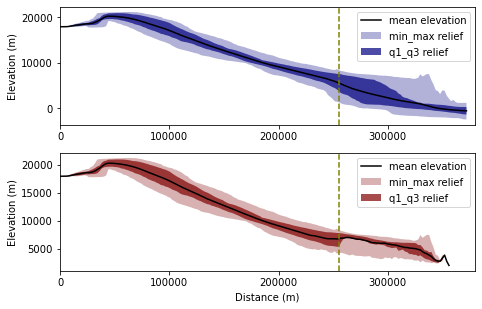

In [10]:
import matplotlib.pyplot as plt

cases = [orig, tpi]
colors = ['navy', 'maroon']

fig, ax = plt.subplots(2, 1, figsize=(6.8,4.4))
fig.subplots_adjust(hspace=0.2)

for i in range(len(cases)):
    cases[i].profile_plot(ax=ax[i], color=colors[i])
    ax[i].axvline(x=255000, color='olive', lw=1.5, linestyle='--')
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Elevation (m)")
    ax[i].set_xticks([0, 100000, 200000, 300000])
    ax[i].set_xlim([0,380000])

    if i == len(cases)-1:
        ax[i].set_xlabel("Distance (m)")

The calibrated polygons overlapping the hillshade of Olympus Mons are shown in Figure 12 of [PyOSP paper](https://www.sciencedirect.com/science/article/abs/pii/S0169555X21001860). Results show that the TPI-based method accurately delineates the edifice along the boundary of the basal scarp, whereas the fixed-radius swath invariably generated a circular area that includes unwanted areas beyond the volcano.The pronounced fall in IQR at 255,000m on the TPI-based swath signals a reduction in datapoints along the southeastern basal scarp and marks the boundary of asymmetry.

### Slice plot across the valcano

Next, we used PyOSP to plot four topographic profiles across the volcano.

<ipython-input-12-aef1d7cad2a0>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ax_num].set_xticklabels([int(abs(tick)) for tick in ticks])


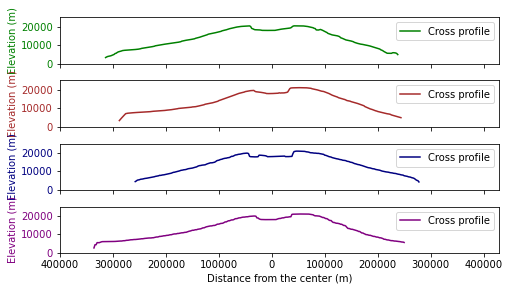

In [12]:
import numpy as np

angles = [0, 180, 270, 90, 225, 45, 315, 135]

sector = np.arange(tpi.ng_start, tpi.ng_end+1e-10,
                   tpi.ng_stepsize)

value_all = []
d_all = []

for i in angles:
    ng_ind = np.abs(sector - i).argmin()
    points = tpi.lines[ng_ind]
    values = tpi.dat[ng_ind]
    values = values[~np.isnan(values)]

    d = []
    for point in points:
        d_temp = np.sqrt((point[0]-points[0][0])**2
                         +(point[1]-points[0][1])**2)
        d.append(d_temp)

    value_all.append(values)
    d_all.append(d)

fig, ax = plt.subplots(4, 1, figsize=(7.2,4))
fig.subplots_adjust(hspace=0)

ax_num = 0
colors = ['green', 'brown', 'navy', 'purple']

for x, y in zip(*[iter(range(len(angles)))] * 2):
    d_r = d_all[x]
    d_l = [-1 * i for i in d_all[y]][::-1]
    value_r = value_all[x]
    value_l = value_all[y][::-1]

    d = d_l + d_r[1:None]
    value = np.concatenate((value_l, value_r[1:None]))
    
    ax[ax_num].plot(d, value, color=colors[ax_num], label="Cross profile")
    ax[ax_num].set_xlim([-400000, 430000])
    ax[ax_num].set_ylim([0, 25000])
    ax[ax_num].set_yticks([0, 10000, 20000])
    ax[ax_num].tick_params(axis='y', labelcolor=colors[ax_num])
    ax[ax_num].set_xticklabels([])
    ax[ax_num].set_ylabel("Elevation (m)", color=colors[ax_num])
    ax[ax_num].legend()

    if ax_num == len(colors)-1:
        ticks = ax[ax_num].get_xticks()
        ax[ax_num].set_xticklabels([int(abs(tick)) for tick in ticks])
        ax[ax_num].set_xlabel('Distance from the center (m)')

    ax_num += 1

plt.tight_layout()  

## Summary

This tutorial introduces the swath analysis of Olympus Mons by PyOSP, which corresponds to section 4.3 of [PyOSP paper](https://www.sciencedirect.com/science/article/abs/pii/S0169555X21001860). 

If you have any questions, you can open an issue at https://github.com/PyOSP-devs/PyOSP, or send emails to yichuan211@gmail.com

Cheers!